In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

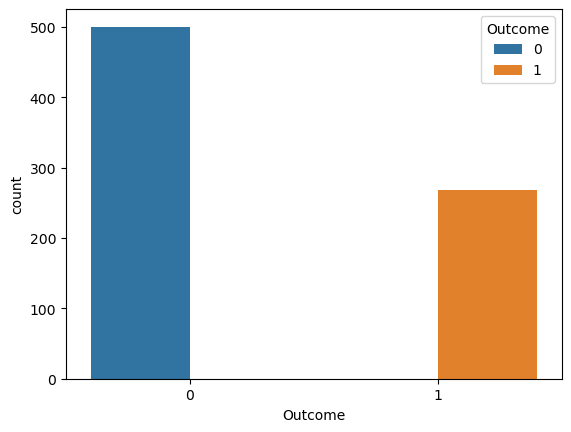

In [16]:
sns.countplot(data=data,x=data.Outcome,hue ="Outcome")
plt.show()

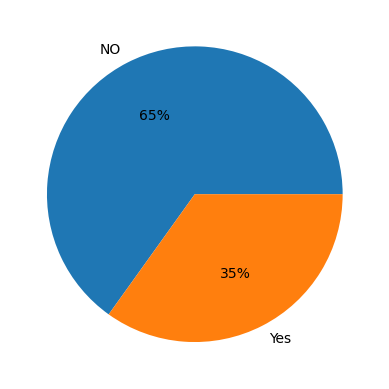

In [24]:
plt.pie(data.Outcome.value_counts(),autopct='%.0f%%',labels=["NO","Yes"])
plt.show()

In [29]:
# standarization features

stdn = StandardScaler()
X = stdn.fit_transform(data.drop(columns= "Outcome",axis=1))
print(X)
Y =data["Outcome"]

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [31]:
# train and test data

Xtrain,XTest,YTrain,YTest = train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)
print(Xtrain)

[[-1.14185152 -0.05929342 -3.57259724 ...  0.05170968 -0.9992857
  -0.78628618]
 [ 0.63994726 -0.49745345  0.04624525 ... -0.15136112 -1.05666795
   0.31985461]
 [-0.84488505  2.13150675 -0.47073225 ... -0.24020459 -0.2231152
   2.19178518]
 ...
 [ 2.12477957 -1.12339636  0.25303625 ... -0.24020459 -0.51908683
   0.14967911]
 [ 0.04601433 -0.27837344  0.45982725 ...  0.94014439 -0.71237443
   0.40494237]
 [-1.14185152 -1.09209922 -0.05715025 ...  0.48323511 -0.70633419
  -0.70119842]]


In [36]:
# model evaluation

svmModel = svm.SVC(kernel='linear')
classifier = svmModel.fit(Xtrain,YTrain)

In [42]:
predict = classifier.predict(Xtrain)
accuracy = accuracy_score(predict,YTrain)

In [43]:
accuracy

0.7866449511400652

In [44]:
XTestPr = classifier.predict(XTest)
accuracyT = accuracy_score(XTestPr,YTest)

In [45]:
accuracyT

0.7727272727272727

In [59]:
# Making Prediction system

inputs = (5,166,72,19,175,25.8,0.587,51)
inputAr = np.asarray(inputs).reshape(1,-1)
stdIn = stdn.fit_transform(inputAr)

vl = classifier.predict(stdIn)
if vl[0] == 1:
    print("daibetes")
else:
    print(' no daibetes')

 no daibetes
